### General Instructions: 
- Due Date: Sunday Jan 30, 5 PM 
- Submission: Please work on this Notebook and leave it in your account on the server. We have a crontab job which will copy your submission Notebook from your account at sharp 5 PM on Sunday, Jan 30. Any changes made to Notebook after 5 PM, Sunday, Jan 30 will not be reflected in the submitted assignment. DO NOT change the name or location of this file on the server.
- __Plagiarism will not be tolerated in any form. Zero points will be awarded for the entire assignment in such cases__.

In [6]:
# Answer 1:

def get_fibonacci_term(n):
       
    if n < 0:
        print("n cannot be negative")
        return
    
    # base case
    if n==0 or n==1:
        return n
    
    # recursive case
    return get_fibonacci_term(n-1) + get_fibonacci_term(n-2)

In [7]:
print(get_fibonacci_term(4))

3


bond length  
 [1.         1.03030303 1.06060606 1.09090909 1.12121212 1.15151515
 1.18181818 1.21212121 1.24242424 1.27272727 1.3030303  1.33333333
 1.36363636 1.39393939 1.42424242 1.45454545 1.48484848 1.51515152
 1.54545455 1.57575758 1.60606061 1.63636364 1.66666667 1.6969697
 1.72727273 1.75757576 1.78787879 1.81818182 1.84848485 1.87878788
 1.90909091 1.93939394 1.96969697 2.         2.03030303 2.06060606
 2.09090909 2.12121212 2.15151515 2.18181818 2.21212121 2.24242424
 2.27272727 2.3030303  2.33333333 2.36363636 2.39393939 2.42424242
 2.45454545 2.48484848 2.51515152 2.54545455 2.57575758 2.60606061
 2.63636364 2.66666667 2.6969697  2.72727273 2.75757576 2.78787879
 2.81818182 2.84848485 2.87878788 2.90909091 2.93939394 2.96969697
 3.         3.03030303 3.06060606 3.09090909 3.12121212 3.15151515
 3.18181818 3.21212121 3.24242424 3.27272727 3.3030303  3.33333333
 3.36363636 3.39393939 3.42424242 3.45454545 3.48484848 3.51515152
 3.54545455 3.57575758 3.60606061 3.63636364 3.6

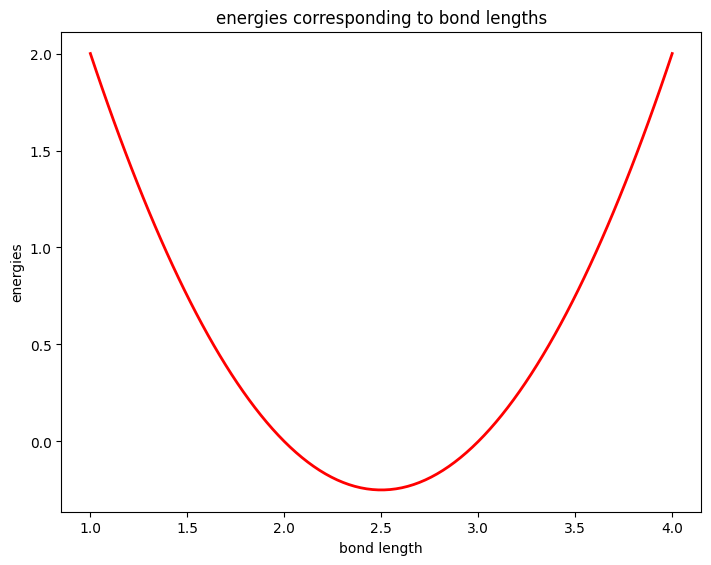

minimum energy  -0.24977043158861356  and it is corresponding to bond length -> 2.515151515151515


In [8]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import re


bond_length_array = np.linspace(1,4,100)
print("bond length ", '\n', bond_length_array)

print('\n', "size of bond length array : ", bond_length_array.size)

# to store energies at all bond lengths
energies = []

for i in bond_length_array:
    energy = (i**2) - (5*i) + (6)
    energies.append(energy)


print('\n', "size of energies array : ", len(energies),'\n')



for i in range(100):
    print("bond length",bond_length_array[i], " energy ", energies[i])



fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,1])

axes.plot(bond_length_array,energies,'r',linewidth=2, markersize=12)

axes.set_title('energies corresponding to bond lengths')
axes.set_xlabel('bond length')
axes.set_ylabel('energies')

plt.show()

print("minimum energy ", min(energies)," and it is corresponding to bond length ->", bond_length_array[np.argmin(energies)])


In [9]:
def read_xyz_file(file):

    data = open(file, 'r')

    lines = data.readlines()

    total_number_of_atoms = int(lines[0])

    print("total number of atom present : ",total_number_of_atoms)

    position_vector = []

    da = lines[1].split()
    print(da)
    print(da[0])

    
    a = re.findall(r'\d+\.\d+', da[0])
    a = float(a[0])
    print(a)
    

    position_vector = []

    pos1 = []
    pos1.append(a)
    pos1.append(0.0)
    pos1.append(0.0)

    print(pos1)
   
    pos2 = []
    i = 3
    while i <=5:
        pos2.append(float(da[i]))
        i+=1
    print(pos2)

    i = 6
    pos3 = []
    while i <=8:
        if i == 8:
            pos3.append(float(re.findall(r'\d+\.\d+', da[i])[0]))
        else:
            pos3.append(float(da[i]))
        i+=1
    
    print(pos3)
    

    


    position_vector.append(np.array(pos1))
    position_vector.append(np.array(pos2))
    position_vector.append(np.array(pos3))

    
    position_vector = np.array(position_vector)
    print("position lattice vector : \n", position_vector)


    types_of_atoms_present = set()

    i = 2
    while i <= total_number_of_atoms:
        da = lines[i].split()
        types_of_atoms_present.add(da[0])
        
        
        i += 1

    types_of_atoms_present = list(types_of_atoms_present)
    print("types of atoms present : ", types_of_atoms_present)
    
   

    total_unique_atoms = len(types_of_atoms_present)
    print("total number of unique atoms present : ", total_unique_atoms)

    
    # to stores the number of atoms present in each atom
    symbols = {}

    for i in range(total_unique_atoms):

        types_atom = types_of_atoms_present[i]
        types_atom_count = 0
        i=2
        while i <= total_number_of_atoms+1:
            da = lines[i].split()
            if types_atom == da[0]:
                types_atom_count += 1
            i+=1
        
        symbols[types_atom] = types_atom_count

    print("the numbers of atoms of each types", symbols)

   

    
    coordinates = {}

    for i in range(total_unique_atoms):
        coordinates_of_atom = []
        atoms_type_coordinates = types_of_atoms_present[i]
        j = 2
        while j <= total_number_of_atoms+1:
            da = lines[j].split()
            if atoms_type_coordinates == da[0]:
                coordinates_of_atom.append([float(da[1]),float(da[2]),float(da[3])])
            j += 1 
        coordinates_of_atom = np.array(coordinates_of_atom)
        coordinates[types_of_atoms_present[i]] = coordinates_of_atom 
        
    print("the coordinates of all atoms" , coordinates)   

    data = { 'coordinates' : coordinates,
            'position_vector':position_vector,
             'types_of_atoms_present':types_of_atoms_present,
             'total_unique_atoms':total_unique_atoms,
             'symbols':symbols}
    
    return data

In [10]:
data = read_xyz_file('structure.xyz')

total number of atom present :  24
['Lattice="4.86063', '0.0', '0.0', '0.0', '5.8855', '0.0', '0.0', '0.0', '9.9142"', 'Properties=species:S:1:pos:R:3:Z:I:1', 'spacegroup="P', '1"', 'unit_cell=conventional', 'pbc="T', 'T', 'T"']
Lattice="4.86063
4.86063
[4.86063, 0.0, 0.0]
[0.0, 5.8855, 0.0]
[0.0, 0.0, 9.9142]
position lattice vector : 
 [[4.86063 0.      0.     ]
 [0.      5.8855  0.     ]
 [0.      0.      9.9142 ]]
types of atoms present :  ['Fe', 'P', 'O']
total number of unique atoms present :  3
the numbers of atoms of each types {'Fe': 4, 'P': 4, 'O': 16}
the coordinates of all atoms {'Fe': array([[2.19156085, 4.414125  , 7.67418565],
       [0.23875415, 4.414125  , 2.71708565],
       [2.66906915, 1.471375  , 2.24001435],
       [4.62187585, 1.471375  , 7.19711435]]), 'P': array([[4.38122606, 4.414125  , 5.88725024],
       [2.90971894, 4.414125  , 0.93015024],
       [0.47940394, 1.471375  , 4.02694976],
       [1.95091106, 1.471375  , 8.98404976]]), 'O': array([[1.02641924, 4

In [11]:
def write_poscar(file_name):

    f = open(file_name, 'w')
   
    for items in data['types_of_atoms_present']:
        f.write('%s  ' %items)
    a = 1
    f.write('\n  %f \n' %a)

    for k in range(3):
        for i in data['position_vector'][k]:
            f.write("     ")
            f.write("%.15f" % float(i))
            f.write("   ")
        f.write("\n")    

    a1 = "   ".join([str(x) for x in data['types_of_atoms_present']])
    f.write(a1+'\n')


    for i in data['types_of_atoms_present']:
        
        f.write("   "+str(data['symbols'][i]))

    f.write("\nCartesian\n")
    

    for k in range(data['total_unique_atoms']):

        a = data['types_of_atoms_present']
        a = a[k]

        for i in range(data['symbols'][a]):
        
            data['coordinates'][a][i] = np.array(data['coordinates'][a][i])
            
            a1 =  data['coordinates'][a][i][0]
            a2 =  data['coordinates'][a][i][1]
            a3 =  data['coordinates'][a][i][2]
            f.write("%.15f" % (a1))
            f.write("      "+str("%.15f" % (a2)))
            f.write("      "+str("%.15f" % (a3)))
            f.write("\n")
                  
                                        

In [12]:
write_poscar('POSCAR')

In [13]:
def from_xyz_to_POSCAR(xyz_filename):
    '''
    Description: function to read given file (whose filename is given as input) 
             and convert it into the POSCAR file. 
        The input file name is passed as an input to function.
    Input: xyz_filename; filename of xyz file to read the structure from
    Output: Name of the POSCAR file.
    '''
    data = read_xyz_file(xyz_filename)
    write_poscar('POSCAR')
    
    s = 'POSCAR'
    
    
    return s

In [14]:
from_xyz_to_POSCAR('structure.xyz')

total number of atom present :  24
['Lattice="4.86063', '0.0', '0.0', '0.0', '5.8855', '0.0', '0.0', '0.0', '9.9142"', 'Properties=species:S:1:pos:R:3:Z:I:1', 'spacegroup="P', '1"', 'unit_cell=conventional', 'pbc="T', 'T', 'T"']
Lattice="4.86063
4.86063
[4.86063, 0.0, 0.0]
[0.0, 5.8855, 0.0]
[0.0, 0.0, 9.9142]
position lattice vector : 
 [[4.86063 0.      0.     ]
 [0.      5.8855  0.     ]
 [0.      0.      9.9142 ]]
types of atoms present :  ['Fe', 'P', 'O']
total number of unique atoms present :  3
the numbers of atoms of each types {'Fe': 4, 'P': 4, 'O': 16}
the coordinates of all atoms {'Fe': array([[2.19156085, 4.414125  , 7.67418565],
       [0.23875415, 4.414125  , 2.71708565],
       [2.66906915, 1.471375  , 2.24001435],
       [4.62187585, 1.471375  , 7.19711435]]), 'P': array([[4.38122606, 4.414125  , 5.88725024],
       [2.90971894, 4.414125  , 0.93015024],
       [0.47940394, 1.471375  , 4.02694976],
       [1.95091106, 1.471375  , 8.98404976]]), 'O': array([[1.02641924, 4

'POSCAR'